<a href="https://colab.research.google.com/github/EBUSYGIN/ML-3/blob/serobyan/%D0%90%D0%B0%D0%B0%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
#Загружем файлы
train_path = "/content/sample_data/train.xlsx"
test_path = "/content/sample_data/test.xlsx"


#Загрузка данных
train_data = pd.read_excel(train_path)
test_data = pd.read_excel(test_path)


In [ ]:
# Просмотр первых строк
train_data.head(), test_data.head()

(          dt  Цена на арматуру
 0 2015-01-05             32900
 1 2015-01-12             32500
 2 2015-01-19             32000
 3 2015-01-26             30700
 4 2015-02-02             30300,
           dt  Цена на арматуру
 0 2022-09-05             46000
 1 2022-09-12             46000
 2 2022-09-19             46000
 3 2022-09-26             45500
 4 2022-10-03             45500)

In [ ]:
#Преобразование dt в datetime
train_data["dt"] = pd.to_datetime(train_data["dt"])
test_data["dt"] = pd.to_datetime(test_data["dt"])

#Установка dt в качестве индекса
train_data.set_index("dt", inplace=True)
test_data.set_index("dt", inplace=True)

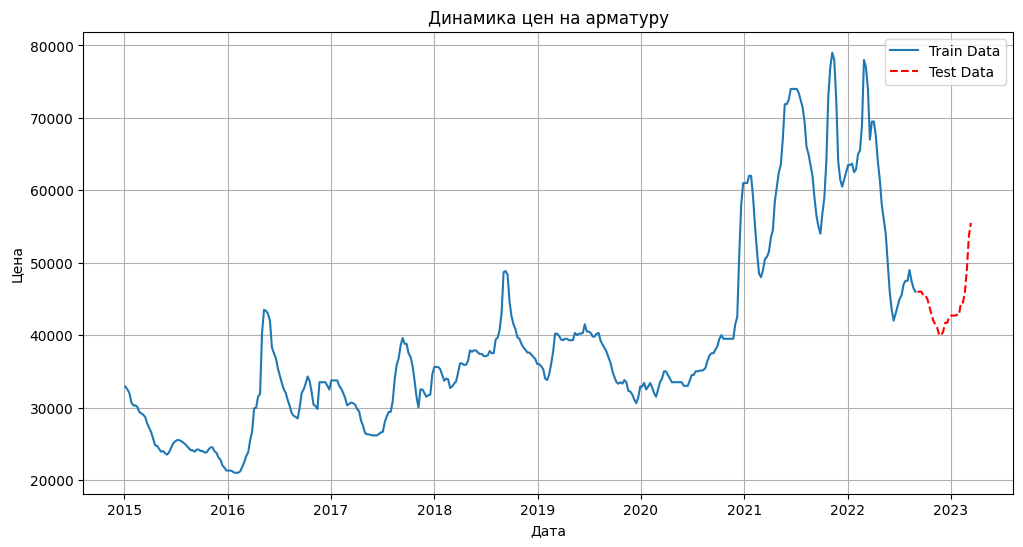

In [ ]:
#Визуализация динамики цен
plt.figure(figsize=(12, 6))
sns.lineplot(data=train_data, x=train_data.index, y="Цена на арматуру", label="Train Data")
sns.lineplot(data=test_data, x=test_data.index, y="Цена на арматуру", label="Test Data", linestyle="dashed",  color='red')
plt.title("Динамика цен на арматуру")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Добавление временных признаков
for df in [train_data, test_data]:
    df["year"] = df.index.year
    df["month"] = df.index.month
    df["week"] = df.index.isocalendar().week
    df["dayofyear"] = df.index.dayofyear
    df["lag_1"] = df["Цена на арматуру"].shift(1)
    df["rolling_mean_3"] = df["Цена на арматуру"].rolling(window=3).mean()

In [ ]:
#Удаление строк с пропущенными значениями
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

#Определение целевой переменной
y_train = train_data["Цена на арматуру"]
y_test = test_data["Цена на арматуру"]

#Определение признаков
features = ["year", "month", "week", "dayofyear", "lag_1", "rolling_mean_3"]

#Создание полиномиальных признаков
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(train_data[features])
X_test_poly = poly.transform(test_data[features])

#Обучение модели
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_poly, y_train)

#Прогноз
y_pred = model.predict(X_test_poly)

#Оценка качества
mae = mean_absolute_error(y_test, y_pred)
mae

1085.673076923077

In [ ]:
print("Столбцы в test_data:", test_data.columns)

Столбцы в test_data: Index(['Цена на арматуру', 'year', 'month', 'week', 'dayofyear', 'lag_1',
       'rolling_mean_3'],
      dtype='object')


In [ ]:
print(test_data.head())

            Цена на арматуру  year  month  week  dayofyear    lag_1  \
dt                                                                    
2022-09-19             46000  2022      9    38        262  46000.0   
2022-09-26             45500  2022      9    39        269  46000.0   
2022-10-03             45500  2022     10    40        276  45500.0   
2022-10-10             45000  2022     10    41        283  45500.0   
2022-10-17             44000  2022     10    42        290  45000.0   

            rolling_mean_3  
dt                          
2022-09-19    46000.000000  
2022-09-26    45833.333333  
2022-10-03    45666.666667  
2022-10-10    45333.333333  
2022-10-17    44833.333333  


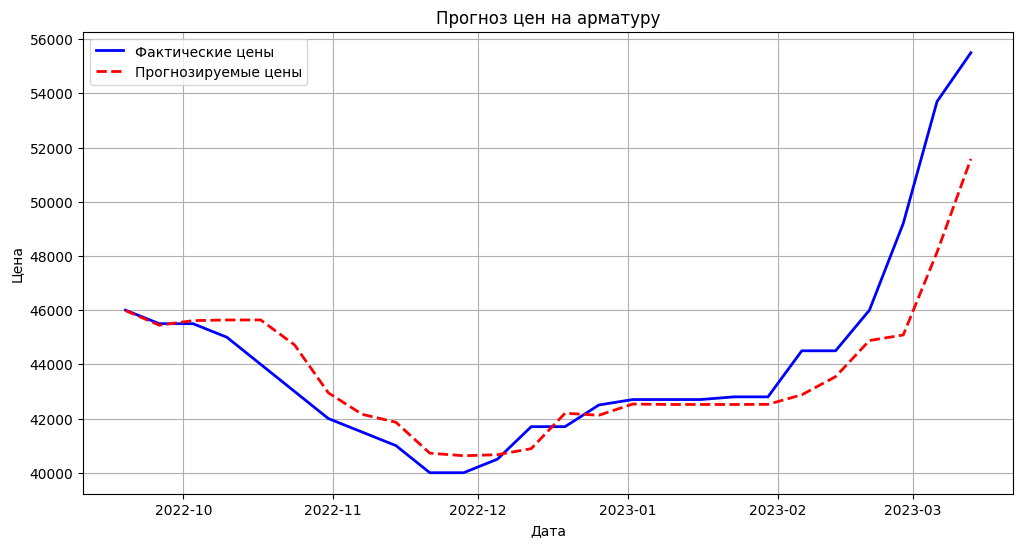

In [ ]:
# Визуализация прогноза
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label="Фактические цены", color='blue', linewidth=2)
plt.plot(test_data.index, y_pred, label="Прогнозируемые цены",  color='red', linestyle='--', linewidth=2)
plt.title("Прогноз цен на арматуру")
plt.xlabel("Дата")
plt.ylabel("Цена")
plt.legend()
plt.grid(True)
plt.show()